In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
#from tensorflow import keras
import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics



In [13]:

import torch 
from torch import nn 
# 1，查看gpu信息
import torch
print(torch.version.cuda)
 



None


In [2]:
df = pd.read_excel('1128 新标注数据 吸气18_19 呼气1_12随机8个位置.xlsx')
df['I/E']=df['I/E'].apply(lambda x:2 if x==-1 else x)
y = df['I/E'].astype('int64')
x = df.iloc[:, 0:25]
x1 = x.T
scaler_x = StandardScaler()
scaler_x.fit(x1)
npx = scaler_x.transform(x1)
npx     #(25,7660)

array([[-0.57478579, -0.55772702, -0.58995198, ...,  2.74395515,
        -1.91789413, -1.81690268],
       [-0.57478579, -0.53604229, -0.57299923, ...,  1.51722975,
        -1.7149635 , -1.62845234],
       [-0.55717579, -0.53604229, -0.57299923, ...,  0.26591973,
        -1.51203489, -1.43994763],
       ...,
       [ 1.88179088,  1.82757723,  1.88513148, ...,  0.85477566,
         1.23800485,  1.2929493 ],
       [ 2.40128068,  2.48895512,  2.38524719, ...,  0.97748642,
         1.31498459,  1.38718806],
       [ 2.89435549,  3.12864829,  2.85143542, ...,  1.07564087,
         1.38496067,  1.48142682]])

In [3]:
npx=npx.T
y = np.array(y)
len(y)

39573

In [4]:
npx = npx.reshape(39573,25,1)
# npx = npx.reshape(39573,25)
npx

array([[[-0.57478579],
        [-0.57478579],
        [-0.55717579],
        ...,
        [ 1.88179088],
        [ 2.40128068],
        [ 2.89435549]],

       [[-0.55772702],
        [-0.53604229],
        [-0.53604229],
        ...,
        [ 1.82757723],
        [ 2.48895512],
        [ 3.12864829]],

       [[-0.58995198],
        [-0.57299923],
        [-0.57299923],
        ...,
        [ 1.88513148],
        [ 2.38524719],
        [ 2.85143542]],

       ...,

       [[ 2.74395515],
        [ 1.51722975],
        [ 0.26591973],
        ...,
        [ 0.85477566],
        [ 0.97748642],
        [ 1.07564087]],

       [[-1.91789413],
        [-1.7149635 ],
        [-1.51203489],
        ...,
        [ 1.23800485],
        [ 1.31498459],
        [ 1.38496067]],

       [[-1.81690268],
        [-1.62845234],
        [-1.43994763],
        ...,
        [ 1.2929493 ],
        [ 1.38718806],
        [ 1.48142682]]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(npx,y,test_size=0.3,random_state=12,shuffle=True)
X_test.shape

(11872, 25, 1)

In [6]:
X_train, X_test, y_train, y_test

(array([[[ 1.29878586],
         [ 0.78690919],
         [ 0.28194587],
         ...,
         [ 1.23998753],
         [ 1.37488251],
         [ 1.49593085]],
 
        [[-1.90616778],
         [-1.66669886],
         [-1.42722994],
         ...,
         [ 1.3266454 ],
         [ 1.3266454 ],
         [ 1.44638331]],
 
        [[ 1.35125403],
         [ 1.33481232],
         [ 1.29918505],
         ...,
         [-1.39625802],
         [-1.34692656],
         [-1.3003342 ]],
 
        ...,
 
        [[-0.55399829],
         [-0.54802845],
         [-0.53608704],
         ...,
         [ 1.86377683],
         [ 2.46074367],
         [ 3.02788714]],
 
        [[-1.80422382],
         [-1.62760529],
         [-1.45098677],
         ...,
         [ 1.31561234],
         [ 1.43335802],
         [ 1.53633244]],
 
        [[-1.76936614],
         [-1.62599999],
         [-1.44674578],
         ...,
         [ 1.34925597],
         [ 1.45680643],
         [ 1.56432587]]]),
 array([[[ 1.623130

In [7]:
def lstm_fcn_model(input_shape, num_classes):
    # 定义模型结构
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.LSTM(8)(inputs)
    x = layers.Reshape((8, 1))(x)
    x1 = layers.Conv1D(32, 8, padding='same', activation='relu')(x)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv1D(64, 5, padding='same', activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv1D(32, 3, padding='same', activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.GlobalAveragePooling1D()(x1)
    x2 = layers.Conv1D(32, 8, padding='same', activation='relu')(x)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv1D(64, 5, padding='same', activation='relu')(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv1D(32, 3, padding='same', activation='relu')(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.GlobalMaxPooling1D()(x2)
    x = layers.Concatenate()([x1, x2])
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

In [8]:
model = lstm_fcn_model(input_shape=(25, 1), num_classes=3)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 25, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 8)         │        320 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 8, 1)      │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 8, 32)     │        288 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 8, 32)     │        288 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 8, 32)     │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 8, 64)     │     10,304 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 8, 64)     │     10,304 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 64)     │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 64)     │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 8, 32)     │      6,176 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 8, 32)     │      6,176 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │        195 │ dropout[0][0]   

 Total params: 35,075 (137.01 KB)

 Trainable params: 34,563 (135.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8722 - loss: 0.3677 - val_accuracy: 0.9367 - val_loss: 0.1608
Epoch 2/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9315 - loss: 0.1780 - val_accuracy: 0.9428 - val_loss: 0.1614
Epoch 3/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9394 - loss: 0.1554 - val_accuracy: 0.9108 - val_loss: 0.1670
Epoch 4/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9397 - loss: 0.1492 - val_accuracy: 0.9576 - val_loss: 0.1217
Epoch 5/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9470 - loss: 0.1354 - val_accuracy: 0.9526 - val_loss: 0.1355
Epoch 6/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9465 - loss: 0.1357 - val_accuracy: 0.9556 - val_loss: 0.1115
Epoch 7/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9551 - loss: 0.1210 - val_accuracy: 0.9463 - val_loss: 0.1299
Epoch 8/50
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9549 - loss: 0.1212 - val_accuracy: 0.

In [11]:
history.history.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

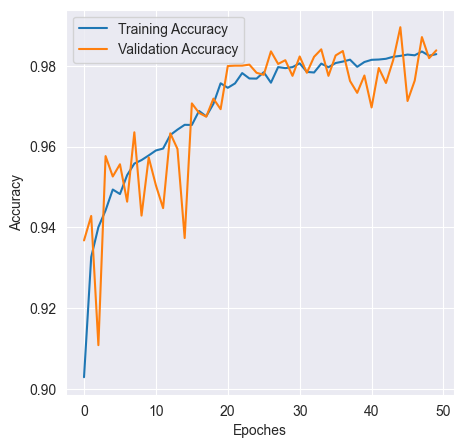

In [12]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoches')
plt.legend()
plt.show()

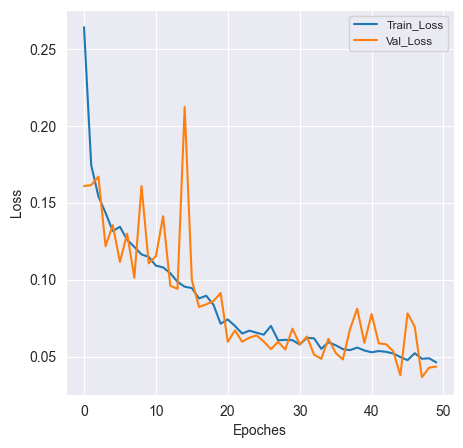

In [13]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(loss, label='Train_Loss')
plt.plot(val_loss, label='Val_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend(loc='upper right',fontsize='small', ncol=1, frameon=True)
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.04344024136662483
Test Accuracy: 0.9838274717330933


In [15]:
print(X_test.shape)
print(X_test)

(11872, 25, 1)
[[[ 1.62313067]
  [ 1.52271383]
  [ 1.3949046 ]
  ...
  [-1.32553433]
  [-1.32553433]
  [-1.30726834]]

 [[ 1.36521918]
  [ 1.30977107]
  [ 1.24928063]
  ...
  [-1.47781396]
  [-1.62601292]
  [-1.76816632]]

 [[ 2.12239889]
  [ 1.87367029]
  [ 1.61995549]
  ...
  [-1.08129212]
  [-1.05145387]
  [-1.02409078]]

 ...

 [[ 1.40166081]
  [ 1.33390693]
  [ 1.25486254]
  ...
  [-1.49273691]
  [-1.67340452]
  [-1.85030391]]

 [[-1.72921767]
  [-1.57257843]
  [-1.41598437]
  ...
  [ 1.40352191]
  [ 1.56011597]
  [ 1.56011597]]

 [[-1.75830578]
  [-1.62138207]
  [-1.4502225 ]
  ...
  [ 1.32287259]
  [ 1.4597963 ]
  [ 1.56252364]]]


In [16]:
pre = model.predict(X_test).argmax(1)
print(classification_report(y_test,pre))
X_test[1]

371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6106
           1       0.99      1.00      0.99      1121
           2       0.98      0.98      0.98      4645

    accuracy                           0.98     11872
   macro avg       0.98      0.99      0.99     11872
weighted avg       0.98      0.98      0.98     11872


array([[ 1.36521918],
       [ 1.30977107],
       [ 1.24928063],
       [ 1.18274173],
       [ 1.10511204],
       [ 1.01538834],
       [ 0.91557708],
       [ 0.80467795],
       [ 0.68269384],
       [ 0.55263445],
       [ 0.41552628],
       [ 0.27135683],
       [ 0.12114152],
       [-0.03311084],
       [-0.19239709],
       [-0.35370144],
       [-0.51703027],
       [-0.68035329],
       [-0.8436705 ],
       [-1.00699643],
       [-1.16729812],
       [-1.32456977],
       [-1.47781396],
       [-1.62601292],
       [-1.76816632]])

In [17]:
import datetime

# 记录数据输入时间
input_time = datetime.datetime.now()

# 使用模型进行预测，并记录预测时间
pre = model.predict(X_test[394]).argmax(1)
prediction_time = datetime.datetime.now()

# 计算延迟时间
delay_time = (prediction_time - input_time).total_seconds()
# 19 21 11 22 21 21 20 21 20 21 25 23 20

ValueError: as_list() is not defined on an unknown TensorShape.

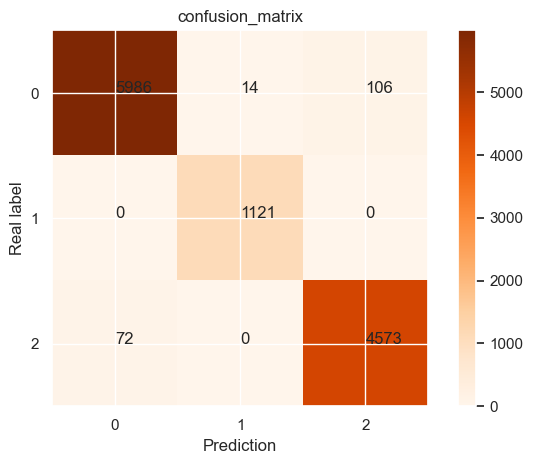

In [18]:
import seaborn as sns
sns.set()
C2 = metrics.confusion_matrix(y_test, pre, labels=[0,1,2])
plt.figure()
classes = [0,1,2]
plt.imshow(C2, interpolation='nearest', cmap=plt.cm.Oranges)  # 按照像素显示出矩阵
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
 
thresh = C2.max() / 2.
# iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
# ij配对，遍历矩阵迭代器
iters = np.reshape([[[i, j] for j in range(len(classes))] for i in range(len(classes))], (C2.size, 2))
for i, j in iters:
    plt.text(j, i, format(C2[i, j]))  # 显示对应的数字
 
plt.ylabel('Real label')
plt.xlabel('Prediction')
plt.tight_layout()
plt.show()

In [19]:
# 误触发率计算
sum = 0
for i in range(len(classes)):
    for j in range(len(classes)):
        sum += C2[i,j]
sum_false = 0
for i in range(len(classes)):
    for j in range(len(classes)):
        if i != j:
            sum_false += C2[i,j]
falsetriggerrate = sum_false/sum     # 误触发率
falsetriggerrate

0.016172506738544475